<a href="https://colab.research.google.com/github/msiplab/EicEngLabIV/blob/develop/example02_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 実験Ⅳー２　時系列データのThingSpeak入力

- ThingSpeak からデータの抽出
- JSON形式をpandas.DataFrameに変換

新潟大学工学部工学科　電子情報通信プログラム

## 準備

In [1]:
!pip install thingspeak
!pip install japanize-matplotlib 
%matplotlib inline
import thingspeak
import json
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import japanize_matplotlib
sns.set(font="IPAexGothic")


     |████████████████████████████████| 4.1MB 2.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120191 sha256=36a8dae6737867adc06daaddcc073a660dc5755135dd166cf3909dc97811306a
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


## ThingSpeakデータの読み込み
- https://thingspeak.com/channels/1101887
- nEntries: 取得するデータ数



In [2]:
nEntries = 240
ch = thingspeak.Channel(1101887,fmt='json')
jsn = json.loads(ch.get({'results': nEntries, 'timezone': 'Asia/Tokyo'})) 
df_feeds = pd.DataFrame(jsn['feeds'])
df_feeds.created_at = pd.to_datetime(df_feeds.created_at) # 日時型に変換
df_feeds.field1 = df_feeds.field1.astype(float)
df_feeds.field2 = df_feeds.field2.astype(float)
df_feeds.field3 = df_feeds.field3.astype(float)
df_timeseries = df_feeds.rename(columns={'created_at': 't',
                    'field1': 'a_1', 'field2': 'a_2', 'field3': 'a_3'})
display(df_timeseries)


,t,entry_id,a_1,a_2,a_3
0,2020-07-19 14:01:11+09:00,691,NaN,NaN,NaN
1,2020-07-19 14:01:12+09:00,692,NaN,NaN,NaN
2,2020-07-19 14:01:13+09:00,693,NaN,NaN,NaN
3,2020-07-19 14:01:14+09:00,694,NaN,NaN,NaN
4,2020-07-19 14:01:15+09:00,695,NaN,NaN,NaN
...,...,...,...,...,...
235,2020-07-19 14:05:19+09:00,926,-8.645916,-5.267801,-1.622371
236,2020-07-19 14:05:20+09:00,927,-6.771274,-6.076853,-2.656915
237,2020-07-19 14:05:21+09:00,928,-4.331692,-8.452383,1.727782
238,2020-07-19 14:05:22+09:00,929,-6.016274,-7.746661,1.403017


## 時系列プロット

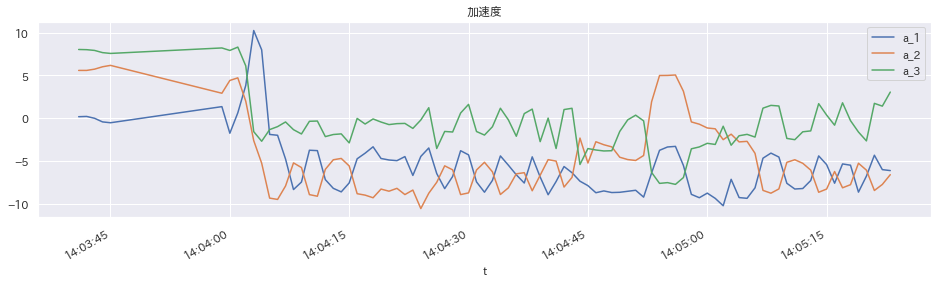

In [3]:
ax = df_timeseries.plot(x='t', y=['a_1', 'a_2', 'a_3'], figsize=(16,4), title='加速度')

## ３次元プロット

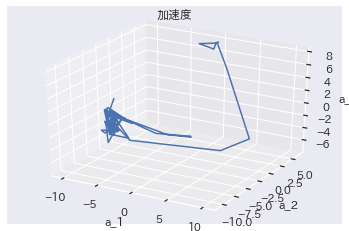

In [4]:
from mpl_toolkits import mplot3d 
ax = plt.axes(projection='3d')
a1 = df_timeseries['a_1']
a2 = df_timeseries['a_2']
a3 = df_timeseries['a_3']
ax.plot(a1,a2,a3)
ax.set_title('加速度')
ax.set_xlabel('a_1')
ax.set_ylabel('a_2')
ax.set_zlabel('a_3')
plt.show()